## Econometric estimation of an IRL-based market portfolio model

Welcome to your final course project on RL in Finance. In this project you will: 

- Explore and estimate an IRL-based model of market returns that is based on IRL of a market-optimal portfolio 
- Investigate the role and impact of choices of different signals on model estimation and trading strategies
- Compare simple IRL-based and UL-based trading strategies

**Instructions for project structure:**

- The project consists of Three parts. The parts are as follows (more detailed instructions are in specific cells below):

- **Part 1**: Completeing the model estimation for the DJI portfolio of 30 stocks, and simple signals such as simple moving averages constructed below.

- **Part 2**: Propose other signals and investigate the dynamics for market caps obtained with alternative signals. Present your conclusions and observations.

- **Part 3**: Repeated the analysis for the S&P portfolio. We have build a data file, build signals, and repeat the model estimation process with our new dataset.


Let's get started!

## The IRL-based model of stock returns

In Week 4 lectures of our course we found that optimal investment policy in the problem of inverse portfolio optimization is a Gaussian policy

$$ \pi_{\theta}({\bf a}_t |{\bf y}_t ) =   \mathcal{N}\left({\bf a}_t | \bf{A}_0 + \bf{A}_1 {\bf y}_t, \Sigma_p \right) $$

Here $ {\bf y}_t $ is a vector of dollar position in the portfolio, and $ \bf{A}_0 $, $ \bf{A}_1 $ and $ \Sigma_p $ are parameters defining a Gaussian policy.   

We said in the lecture that such Gaussian policy is found for both cases of a single investor and a market portfolio. We also sketched a numerical scheme that can iteratively compute coefficients $ \bf{A}_0$, $ \bf{A}_1 $ and $ \Sigma_p $ using a combination of a RL algorithm called G-learning and a trajectory optimization algorithm.

In this project, you will explore implications and estimation of this IRL-based model for the most interesting case - the market portfolio. It turns out that for this case, the model can be estimated in an easier way using a conventional Maximum Likelihood approach. To this end, we will re-formulate the model for this particular case in three easy steps.


Recall that for a vector of $ N $ stocks, we introduced a size $ 2 N $-action vector 
$ {\bf a}_t = [{\bf u}_t^{(+)}, {\bf u}_t^{(-)}] $, so that an action $ {\bf u}_t $ was defined as a difference of two non-negative numbers 
$ {\bf u}_t = {\bf u}_t^{(+)} -  {\bf u}_t^{(-)} = [{\bf 1}, - {\bf 1}] {\bf a}_t \equiv {\bf 1}_{-1}^{T} {\bf a}_t $.

Therefore, the joint distribution of $ {\bf a}_t = [{\bf u}_t^{(+)}, {\bf u}_t^{(-)} ] $ is given by our Gaussian policy
$  \pi_{\theta}({\bf a}_t |{\bf y}_t ) $. This means that the distribution of 
$ {\bf u}_t = {\bf u}_t^{(+)} -  {\bf u}_t^{(-)} $ is also Gaussian. Let us write it therefore as follows:

$$
\pi_{\theta}({\bf u}_t |{\bf y}_t ) =   \mathcal{N}\left({\bf u}_t | \bf{U}_0 + \bf{U}_1 {\bf y}_t, \Sigma_u \right) 
$$

Here $ \bf{U}_0 = {\bf 1}_{-1}^{T}  \bf{A}_0 $ and $ \bf{U}_1 =  {\bf 1}_{-1}^{T}  \bf{A}_1 $.

This means that $ {\bf u}_t $ is a Gaussian random variable that we can write as follows:

$$
{\bf u}_t = \bf{U}_0 + \bf{U}_1 {\bf y}_t + \varepsilon_t^{(u)}  = \bf{U}_0 + \bf{U}_1^{(x)} {\bf x}_t + \bf{U}_1^{(z)} {\bf z}_t + \varepsilon_t^{(u)} 
$$

where $ \varepsilon_t^{(u)} \sim \mathcal{N}(0,\Sigma_u) $ is a Gaussian random noise.  

The most important feature of this expression that we need going forward is is linear dependence on the state $ {\bf x}_t $. 
This is the only result that we will use in order to construct a simple dynamic market model resulting from our IRL model. We use a deterministic limit of this equation, where in addition we set $ \bf{U}_0 = \bf{U}_1^{(z)} = 0 $, and replace $ \bf{U}_1^{(x)} \rightarrow \phi $ to simplify the notation. We thus obtain a simple deterministic policy

$$
\label{determ_u}
{\bf u}_t =  \phi  {\bf x}_t 
$$

Next, let us recall the state equation and return equation (where we reinstate a time step $ \Delta t $,
and $ \circ $ stands for an element-wise (Hadamard) product):

$$
X_{t+ \Delta t} = (1 + r_t \Delta t) \circ (  X_t +  u_t  \Delta t)  
$$
$$
r_t   = r_f + {\bf w} {\bf z}_t -  \mu  u_t + \frac{\sigma}{ \sqrt{ \Delta t}} \varepsilon_t 
$$
where $ r_f $ is a risk-free rate, $ \Delta t $ is a time step, $ {\bf z}_t $ is a vector of predictors with weights $ {\bf w} $, $ \mu $ is a market impact parameter with a linear impact specification, and $ \varepsilon_t \sim \mathcal{N} (\cdot| 0, 1) $ is a white noise residual.


Eliminating $ u_t $ from these expressions and simplifying, we obtain
$$ \Delta  X_t = \mu  \phi  ( 1 + \phi \Delta t) \circ  X_t \circ \left(  \frac{r_f (1 + \phi \Delta t)  + \phi}{ \mu \phi (1+ \phi \Delta t )}  -  X_t \right) \Delta t + 
( 1 + \phi \Delta t) X_t  \circ \left[ {\bf w} {\bf z}_t  \Delta t +  \sigma \sqrt{ \Delta t} \varepsilon_t \right]
$$
Finally, assuming that $ \phi \Delta t \ll 1 $ and taking the continuous-time limit $  \Delta t \rightarrow dt $, we obtain 

$$
d X_t = \kappa \circ X_t \circ \left( \frac{\theta}{\kappa} - X_t \right) dt +  X_t \circ \left[ {\bf w} {\bf z}_t \, dt + \sigma d W_t \right]
$$
where $\kappa   =   \mu  \phi $, $ \theta  =   r_f + \phi $, and $ W_t $ is a standard Brownian motion.

Please note that this equation describes dynamics with a quadratic mean reversion. It is quite different from models with linear mean reversion such as the Ornstein-Uhlenbeck (OU) process. 

Without signals $ {\bf z}_t $, this process is known in the literature as a Geometric Mean Reversion (GMR) process. It has been used (for a one-dimensional setting) by Dixit and Pyndick (" Investment Under Uncertainty", Princeton 1994), and investigated (also for 1D) by Ewald and Yang ("Geometric Mean Reversion: Formulas for the Equilibrium Density and Analytic Moment Matching", {\it University of 
St. Andrews Economics Preprints}, 2007). We have found that such dynamics (in a multi-variate setting) can also be obtained for market caps (or equivalently for stock prices, so long as the number of shares is held fixed) using Inverse Reinforcement Learning! 

(For more details, see I. Halperin and I. Feldshteyn, "Market Self-Learning of Signals, Impact and Optimal Trading: Invisible Hand Inference with Free Energy.
(or, How We Learned to Stop Worrying and Love Bounded Rationality)", https://papers.ssrn.com/sol3/papers.cfm?abstract\_id=3174498) 


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
print('Versions of package libraries used:')
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('TensorFlow version:', tf.__version__)
print('TensorFlow Probability version:', tfp.__version__)

Versions of package libraries used:
Pandas version: 1.0.5
Numpy version: 1.18.5
TensorFlow version: 2.3.1
TensorFlow Probability version: 0.11.1


In [3]:
# read the data to a Dataframe
df_cap = pd.read_csv('dja_cap.csv')

In [4]:
# add dates
dates = pd.bdate_range(start='2010-01-04', end=None, periods=df_cap.shape[0], freq='B')
df_cap['date'] = dates

df_cap.set_index('date',inplace=True)
df_cap.head()


AAPL          AXP            BA          CAT  \
date                                                               
2010-01-04  1.937537e+11  48660795480  4.082033e+10  36460724400   
2010-01-05  1.940887e+11  48553770270  4.215727e+10  36896634000   
2010-01-06  1.910015e+11  49338621810  4.343609e+10  37008725040   
2010-01-07  1.906484e+11  49921314620  4.519446e+10  37158179760   
2010-01-08  1.919159e+11  49885639550  4.475850e+10  37575407520   

                    CSCO           CVX           DIS          DWDP  \
date                                                                 
2010-01-04  1.420313e+11  1.586155e+11  6.168697e+10  3.337392e+10   
2010-01-05  1.413985e+11  1.597391e+11  6.153308e+10  3.486077e+10   
2010-01-06  1.404781e+11  1.597591e+11  6.120609e+10  3.547838e+10   
2010-01-07  1.411109e+11  1.591572e+11  6.122532e+10  3.550126e+10   
2010-01-08  1.418587e+11  1.594381e+11  6.132150e+10  3.562706e+10   

                      GE            GS  ...          NKE           PFE  \
date                                    ...                              
2010-01-04  1.645038e+11  8.897731e+10  ...  25598248500  1.527563e+11   
2010-01-05  1.653556e+11  9.055040e+10  ...  25700093100  1.505775e+11   
2010-01-06  1.645038e+11  8.958393e+10  ...  25543409100  1.500934e+11   
2010-01-07  1.730218e+11  9.133695e+10  ...  26172872700  1.495285e+11   
2010-01-08  1.767484e+11  8.960963e+10  ...  26121202640  1.507389e+11   

                      PG          TRV          UNH          UTX            V  \
date                                                                           
2010-01-04  178576382080  27214839130  36638396010  67155918570  41337043020   
2010-01-05  178634816760  26570118990  36580295160  66152751840  40863360090   
2010-01-06  177787513900  26193121620  36940520430  65805862410  40314638280   
2010-01-07  176823341680  26570118990  38358181170  66087124110  40689832680   
2010-01-08  176589602960  26531872880  37997955900  66218379570  40802391000   

                     VZ           WMT           XOM  
date                                                 
2010-01-04  94536765440  206625627560  3.272107e+11  
2010-01-05  94707204320  204568134680  3.284884e+11  
2010-01-06  90673484160  204110914040  3.313275e+11  
2010-01-07  90133761040  204225219200  3.302865e+11  
2010-01-08  90190574000  203196472760  3.289615e+11  

[5 rows x 30 columns]

## Let us build some signals 

Here we have started the project a "warm start" by computing two simple moving average signals that we can use this benchmark in our analysis.

### Generate moving averages

In [5]:
# Calculating the short-window (10 days) simple moving average

window_1 = 10

short_rolling = df_cap.rolling(window=window_1).mean()
# short_rolling.head(20)

In [6]:
# Calculating the long-window (30 days) simple moving average

window_2 = 30
long_rolling = df_cap.rolling(window=window_2).mean()
# long_rolling.tail()

### Plot three years of AAPL stock:

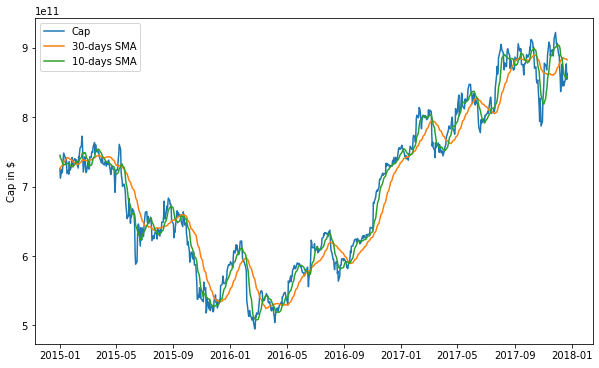

In [7]:
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2017-12-31'

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

ax.plot(df_cap.loc[start_date:end_date, :].index, df_cap.loc[start_date:end_date, 'AAPL'], label='Cap')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'AAPL'], 
          label = '%d-days SMA' % window_2)
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'AAPL'], 
         label = '%d-days SMA' % window_1)

ax.legend(loc='best')
ax.set_ylabel('Cap in $')

plt.show()

## Part 1: Model calibration with moving average signals

Recalling the equation for the dynamics of market portfolio: 

$$ \Delta {\bf x}_t = \kappa_x \circ  {\bf x}_t \circ 
\left( {\bf W}{\bf z}_t'  - {\bf x}_t \right)  +  {\bf x}_t  \circ \varepsilon_t^{(x)} $$

Here we change the notation a bit. Now $ {\bf z}_t' $ is an extended vector of predictors that includes a constant unit predictor $  {\bf z}_t' = [1, {\bf z}_t ]^T $. Therefore, for each name, if you have $ K = 2 $ signals, an extended vector of signals $ {\bf z}_t' $ is of length $ K + 1 $, and the  $ W $ stands for a factor loading matrix.
The negative log-likelihood function for observable data with this model is therefore

$$  LL_M (\Theta) = - \log \prod_{t=0}^{T-1} 
\frac{1}{ \sqrt{ (2 \pi)^{N}  \left| \Sigma_x \right| }} 
e^{ - \frac{1}{2} \left(   {\bf v}_t
 \right)^{T} 
\Sigma_x^{-1}  
\left(  {\bf v}_t \right)} $$

where

$$  {\bf v}_t \equiv \frac{{\bf x}_{t+1} -  {\bf x}_{t}}{{\bf x}_{t}}  
-  \kappa_x \circ \left({\bf W} {\bf z}_t'   - {\bf x}_t \right)  $$

and $ \Sigma_x $ is the covariance matrix that was specified above in terms of other parameters. Here we directly infer the value of $ \Sigma_x $, along with other parameters, from data, so we will not use these previous expressions. 

Parameters that you have to estimate from data are therefore the vector of mean reversion speed 
parameters $ \kappa_x $, factor loading matrix $ {\bf W} \equiv {\bf w}_z' $, and covariance matrix $ \Sigma_x $. 

Now, you are free to impose some structure on this parameters. Here are some choice, in the order of increasing complexity:

- assume that all values in vector-valued and matrix-valued parameters are the same, so that they can parametrized by scalars, e.g. $ \kappa_x = \kappa {\bf 1}_N $ where $ \kappa $ is a scalar value, and $ {\bf 1}_N $ is a vector of ones of length $ N $ where $ N $ is the number of stocks in the market portfolio. You can proceed similarly with specification of factor loading matrix $ W' $. Assume that all values in (diagonal!) factor loading matrices are the same for all names, and assume that all correlations and variances in the covariance matrix $ \Sigma_x $ are the same for all names.   

- Assume that all values are the same only within a given industrial sector.


- You have changed the units. For example, you can consider logs of market caps instead of market caps themselves, ie. change the variable from $ {\bf x}_t  $ to $ {\bf q}_t = \log {\bf x}_t $


## Data Prep

In [8]:
# Manipulate raw data
# NOTE: .sum() has axis 1 because we want the sum of the column which is just
#       1 ticker symbol.
#       .mean() will then take the mean average of all the ticker symbol 
average_market_cap = df_cap.sum(axis=1).mean()

# Average
short_rolling_average = short_rolling / average_market_cap
long_rolling_average = long_rolling / average_market_cap
df_cap_average = df_cap / average_market_cap
#
# Heads for both the long and short de-meaned pandas Dataframes have NaN since they have window of 10 and 30 respectively
# Hence NaN (Not-a-number) is the value for first 10 and 20 rows for short and long rolling DataFrames Respectively
# To start with the first valid number
# Using "first_valid_index" method to return the DataFrame starting with non-NaN 
# i.e., first non-NaN occurence of the DataFrame in the actual df
# 
short_rolling_average_first_valid = (short_rolling_average 
                                    /
                                    short_rolling_average.loc[ short_rolling_average.first_valid_index() ])
long_rolling_average_first_valid = (long_rolling_average
                                   /
                                   long_rolling_average.loc[ long_rolling_average.first_valid_index() ])


# De-mean
# Obtaining the percentage changes of the prices for two consecutive dates in the DataFrame
short_rolling_demeaned = short_rolling_average_first_valid.pct_change(periods=1).shift(-1)
long_rolling_demeaned = long_rolling_average_first_valid.pct_change(periods=1).shift(-1)

In [9]:
# DEBUG
#
type( short_rolling_average )

pandas.core.frame.DataFrame

In [10]:
# DEBUG
#
short_rolling_average.sample( 5,random_state = 42 )

AAPL       AXP        BA       CAT      CSCO       CVX  \
date                                                                     
2015-03-27  0.155711  0.016836  0.020392  0.010817  0.030626  0.040037   
2011-08-17  0.073099  0.011969  0.009774  0.011581  0.017641  0.040420   
2012-01-26  0.096662  0.012602  0.011644  0.015244  0.022423  0.043946   
2010-02-12  0.037010  0.009410  0.009216  0.006927  0.028095  0.029843   
2017-05-25  0.171094  0.015650  0.029110  0.014077  0.032310  0.042006   

                 DIS      DWDP        GE        GS  ...       NKE       PFE  \
date                                                ...                       
2015-03-27  0.038816  0.012412  0.057249  0.018610  ...  0.014484  0.043833   
2011-08-17  0.012588  0.006652  0.034676  0.011629  ...  0.006679  0.029988   
2012-01-26  0.015408  0.008374  0.041790  0.011710  ...  0.008093  0.033761   
2010-02-12  0.012037  0.006488  0.035201  0.016415  ...  0.005164  0.030203   
2017-05-25  0.032592  0.016281  0.043893  0.017781  ...  0.014691  0.040875   

                  PG       TRV       UNH       UTX         V        VZ  \
date                                                                     
2015-03-27  0.044266  0.006679  0.023389  0.021665  0.027958  0.041424   
2011-08-17  0.035852  0.004286  0.010293  0.013554  0.009303  0.021065   
2012-01-26  0.036730  0.004982  0.011741  0.015734  0.012364  0.022327   
2010-02-12  0.037255  0.005413  0.007872  0.012941  0.008153  0.017002   
2017-05-25  0.048808  0.007194  0.038880  0.019251  0.039142  0.040777   

                 WMT       XOM  
date                            
2015-03-27  0.049868  0.073700  
2011-08-17  0.037903  0.073562  
2012-01-26  0.043586  0.084561  
2010-02-12  0.042076  0.064080  
2017-05-25  0.049390  0.067113  

[5 rows x 30 columns]

In [11]:
# Clean data
# The number of rows in short rolling, long rolling and the full dataset are different
# Hence, making the shape of all these DataFrames as the same using the code in this cell

# Drop last row
market_cap = df_cap_average[:-1]

# Drop not-a-numbers
signal_1 = short_rolling_demeaned.copy()
signal_2 = long_rolling_demeaned.copy()
#
signal_1 = signal_1.dropna()
signal_2 = signal_2.dropna()

# # Get rid rows where dates that do not match
market_cap = market_cap[ market_cap.index.isin(signal_1.index) & market_cap.index.isin(signal_2.index)]
signal_1 = signal_1[signal_1.index.isin( market_cap.index )]
signal_2 = signal_2[signal_2.index.isin( market_cap.index )]

In [12]:
# Get the number of time steps and storing in a variable
t = market_cap.shape[0]
t

2050

In [13]:
# Get the number of stocks and storing in a variable
n = market_cap.shape[1]
n

30

## Calibrate with Tensorflow

In [14]:
start_date = '2010-1-1'
end_date = '2017-12-31'

# Only get the dates required
market_cap_focused = market_cap.loc[ start_date : end_date ]
signal_1_focused = signal_1.loc[ start_date : end_date ]
signal_2_focused = signal_2.loc[ start_date : end_date ]

# As mentioned in the instructions, 2 signals; implies, k = 2
k = 2

In [15]:
# Creating a Pandas Dataframe to hold the results
results = pd.DataFrame( [],
                        index = market_cap_focused.columns,
                        columns = [ 'kappa',
                                    'sigma',
                                    'sigma^2',
                                    'w1',
                                    'w2'] )

In [16]:
# Checking whether executing eagerly 
# (this needs to be done when using tensorflow version=1 in code but the package is version=2)
tf.executing_eagerly()

True

In [17]:
# Disabling Eager Execution 
tf.compat.v1.disable_eager_execution()

In [18]:
# re-Checking whether executing eagerly 
tf.executing_eagerly()

False

In [19]:
# Tensorflow graph
tf.compat.v1.reset_default_graph()

# Input
x = tf.compat.v1.placeholder( shape = (None, n),
                    dtype = tf.float32,
                    name = 'x' )

# Signals
z1  = tf.compat.v1.placeholder( shape = (None,n),
                      dtype = tf.float32,
                      name = 'z1' ) 
z2  = tf.compat.v1.placeholder( shape = ( None, n),
                      dtype=tf.float32,
                      name = 'z2' )

# Variables
N_k = n
N_s = n
N_w = n
kappa = tf.compat.v1.get_variable( "kappa",
                         initializer = tf.compat.v1.random_uniform(
                                             [N_k], 
                                             minval = 0.0,
                                             maxval = 1.0) )
sigma = tf.compat.v1.get_variable( "sigma",
                         initializer = tf.compat.v1.random_uniform( 
                                             [N_s],
                                             minval=0.0,
                                             maxval=0.1) )

# Weights
#-------------------
w1_init = tf.compat.v1.random_normal( [N_w],
                            mean=0.5,
                            stddev=0.1 )
w2_init = 1 - w1_init
w1 = tf.compat.v1.get_variable( "w1",
                      initializer = w1_init)
w2 = tf.compat.v1.get_variable( "w2",
                      initializer=w2_init )

W1 = w1*tf.ones(n)
W2 = w2*tf.ones(n)


# Gaussian
#-------------------
mu    = tf.zeros( [n] )
Sigma = sigma*tf.ones( [n] )
theta1 = tf.multiply( W1,
                      z1)
theta2 = tf.multiply( W2,
                      z2)
scale  = tf.slice( x,
                   [0,0],
                   [1,-1] )
theta  = tf.multiply( scale,
                      tf.compat.v1.cumprod( 1 + tf.add( theta1,
                                              theta2) ) )

Kappa = kappa*tf.ones( [n] )

r = tf.divide( tf.subtract( tf.compat.v1.manip.roll( x,
                                           shift = -1,
                                           axis = 0),
                            x),
               x)
v = tf.subtract( r, 
                 tf.multiply( Kappa,
                              tf.subtract( theta,
                                           x) ) )
# NOTE: Do not use last row
vuse = tf.slice( v,
                 [0,0],
                 [tf.shape(v)[0]-1,-1] )

#  Constraint - No negative
#-------------------
clip_w1 = w1.assign(tf.maximum(0., w1))
clip_w2 = w2.assign(tf.maximum(0., w2))
clip = tf.group(clip_w1, clip_w2)

dist = tfp.distributions.MultivariateNormalDiag(loc=mu, scale_diag=Sigma)
log_prob = dist.log_prob(vuse)
reg_term = tf.reduce_sum(tf.square(w1+w2-1))
neg_log_likelihood = -tf.reduce_sum(log_prob) + 0.01*reg_term

# Optimizer
#-------------------
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001)
train_op = optimizer.minimize( neg_log_likelihood )

Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


In [20]:
max_iteration = 5000
tolerence = 1e-15

In [21]:
# If needed, save Tensorflow model because running the weight
# Uncomment the below line and the two lines at the end of this cell to save the model (in the current directory)
# saver = tf.compat.v1.train.Saver()

# Run Tensorflow
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    
    losses = sess.run([neg_log_likelihood], feed_dict={x: market_cap_focused, z1: signal_1_focused, z2: signal_2_focused})
    i=1
    
    # Calibrate print out
    print( "------------------- Calibration Calculating ----------------------" )
    print(" iter |       Loss       |   difference")
    
    while True:

        sess.run(train_op, feed_dict={x: market_cap_focused, z1: signal_1_focused, z2: signal_2_focused})
        sess.run(clip) # force weights to be non-negative

        # update loss
        new_loss = sess.run(neg_log_likelihood, feed_dict={x: market_cap_focused, z1: signal_1_focused, z2: signal_2_focused})
        loss_diff = np.abs(new_loss - losses[-1])
        losses.append(new_loss)

        if i%min(1000,(max_iteration/20))==1:
            print ("{:5} | {:16.4f} | {:12.4f}".format(i,new_loss,loss_diff))

        if loss_diff < tolerence:
            print('Loss function convergence in {} iterations!'.format(i))
            print('Old loss: {}  New loss: {}'.format(losses[-2],losses[-1]))
            break

        if i >= max_iteration:
            print('Max number of iterations reached without convergence.')
            break

        i += 1

    # Storing data (parameters and weights) in pandas Dataframe.
    results['kappa'] = sess.run(kappa)
    results['sigma'] = sess.run(sigma)
    results['sigma^2'] = sess.run(sigma)**2
    results['w1'] = sess.run(W1)
    results['w2'] = sess.run(W2)

    fitted_means = sess.run(theta, feed_dict={x: market_cap_focused, z1: signal_1_focused, z2: signal_2_focused})
    mean_levels = pd.DataFrame(fitted_means,index=market_cap_focused.index,columns=market_cap_focused.columns)
    
    
    print( "------------------- Calibration Results ----------------------" )
    print(results.round(4))
    
    
#     save_path = saver.save(sess, './part01_model.ckpt')
#     print( 'Model saved in path: {}'.format(save_path) )

------------------- Calibration Calculating ----------------------
 iter |       Loss       |   difference
    1 |      561498.3125 |  355904.8750
  251 |     -140950.2500 |     128.7344
  501 |     -163520.0625 |      59.5469
  751 |     -172167.4375 |       8.6562
 1001 |     -173829.8906 |       5.0625
 1251 |     -174859.1250 |       3.3438
 1501 |     -175557.5938 |       2.3438
 1751 |     -176061.2812 |       1.7188
 2001 |     -176440.5469 |       1.3594
 2251 |     -176735.3125 |       1.0469
 2501 |     -176970.1719 |       0.8594
 2751 |     -177160.9531 |       0.6719
 3001 |     -177318.3750 |       0.5781
 3251 |     -177449.8750 |       0.5000
 3501 |     -177560.6094 |       0.4062
 3751 |     -177654.3125 |       0.3125
 4001 |     -177734.1094 |       0.2969
 4251 |     -177802.3125 |       0.2500
 4501 |     -177860.2344 |       0.2500
 4751 |     -177909.6094 |       0.2031
Max number of iterations reached without convergence.
------------------- Calibration Results

In [22]:
# Save the results DataFrame
# Make this cell as code cell to by pressing 'y' when the cell is not in edit mode 
# and then run this cell to save the 'results' dataframe to a CSV file 
# in the current working directory

results.to_csv('df_results_part01.csv')
results.to_csv('df_mean_levels_part01.csv')

### Plot Martket Cap against Fitted Mean Reversion Level

C:\Users\Nabeel Fahmi\anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


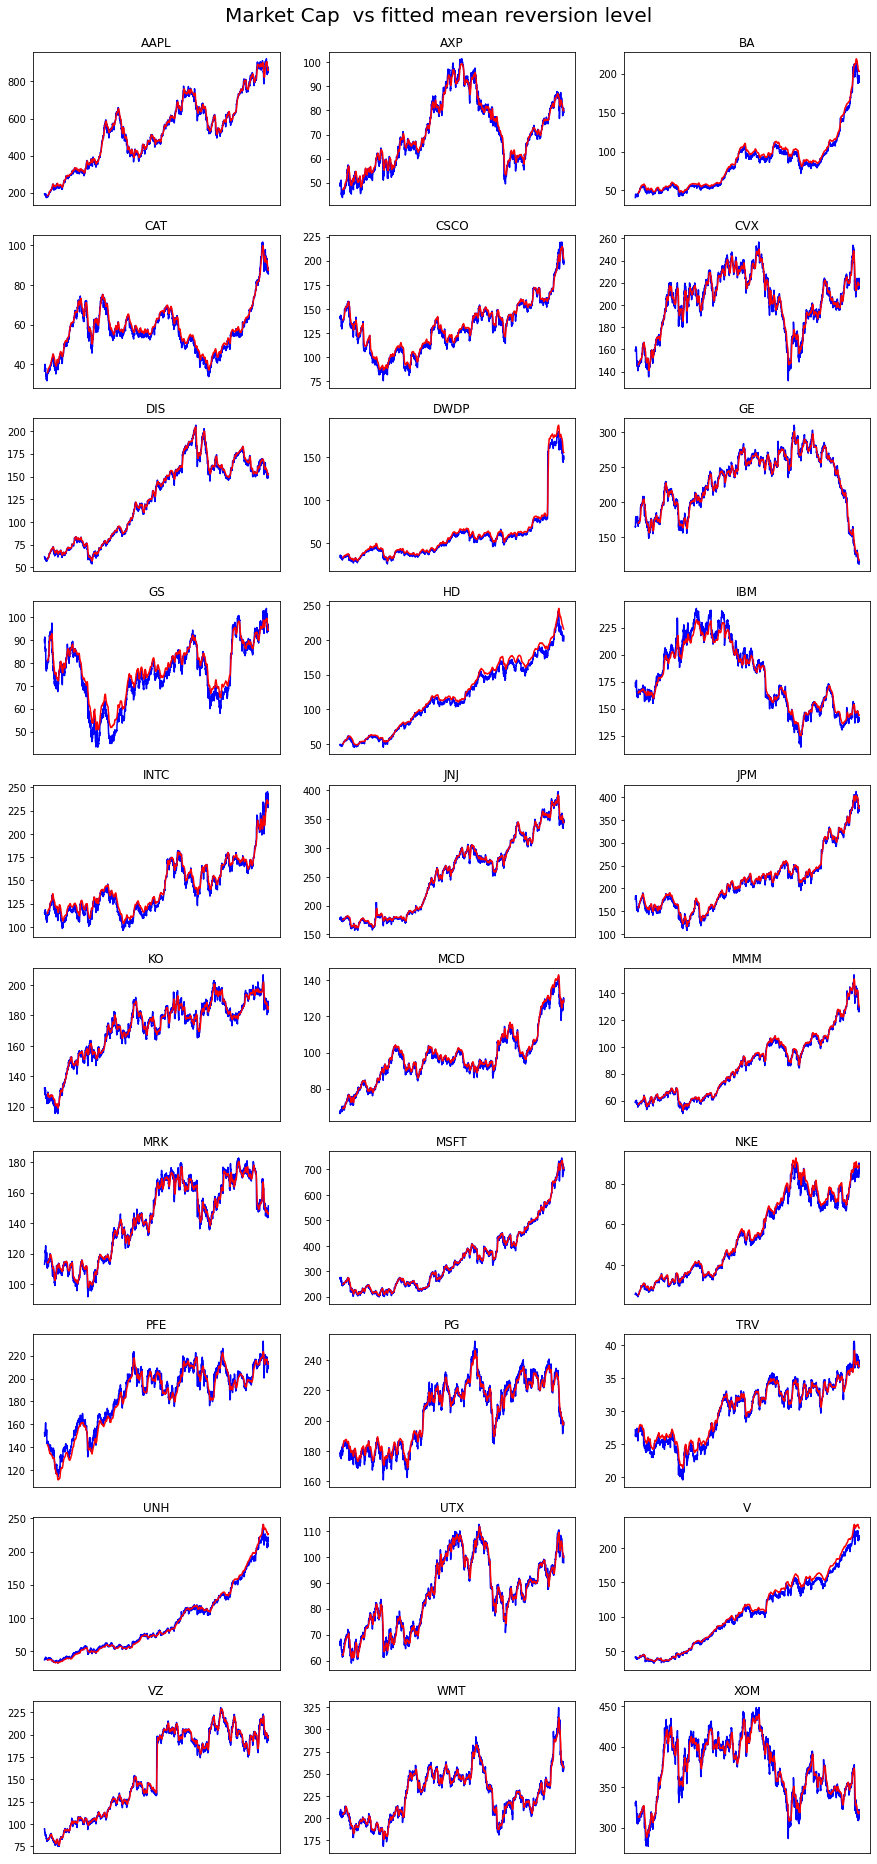

In [23]:
# Plotting the result 
data = df_cap
theta_ = mean_levels
start_date='2010-01-01'
end_date='2017-12-31'
nplot = 30
scale = 1
title = 'Market Cap '

avg_mkt_cap = data.sum(axis=1).mean() # average market cap over the period

N = data.shape[1]


if N > nplot: N = nplot

plt.figure(figsize=(15,N))
plt.suptitle(title + ' vs fitted mean reversion level',size=20)
ytop = 0.96-0.4*np.exp(-N/5)
plt.subplots_adjust(top=ytop)

stocks = data.columns[:N]
for index, stock in enumerate(stocks,1):
    plt.subplot(np.ceil(N/3),3,index)
    plt.plot(scale*(1/1e9)*data.loc[start_date:end_date][stock],color='blue',label='Market cap ($Bn)')
    plt.plot(scale*(avg_mkt_cap/1e9)*theta_.loc[start_date:end_date][stock],color='red',label='Mean reversion level')
    plt.title(stock,size=12)
    plt.xticks([])

plt.show()

### Part 1 - Result - Findings and Conclusion

When the code for TensorFlow (cell with session implementation) is executed, either it converges around 700 to 1000 iterations initially or after a few times, and sometimes after that but within 5000 iterations or does not converge after 5000 iterations. This is due to the randomization of the weights at each initialization. It is fact that the results are unpredictable due to randomization of weights, to be able to reproduce the results, set seed value to some number before running the session. To ensure that the model definitely converges, the number of iterations has to be set to a larger value which may be up to 10,000 or more. If the first session's iterations itself fails after applying the seed value, then re-run the session only after changing the seed value. We can see from the overlapping plot that we have convergence. The moving average signals have been calibrated.

<p style='text-align: center;'> ---------X-----------------------------X-------------------------X---------------------------X--------------------</p>

## Part 2: Propose and analyse your own signals  (Max 10 points)

In this part, you will experiment with other signals. Propose a signal and explain why it is interesting to 
include this signal in the portfolio analysis. Then add your favorite signal or signals to the previous benchmarck signals (or alternatively you can replace them), and repeat the analysis of model calibration. State your conclusions.


In [24]:
exp_wgt_mov_avg_window_a = 7
exp_wgt_mov_avg_window_b = 15

# Provides exponential weighted functions
# Then you take the .mean() to get the average.
exp_wgt_mov_avg_short = df_cap.ewm( span = exp_wgt_mov_avg_window_a,
                                              adjust = False ).mean()
exp_wgt_mov_avg_long = df_cap.ewm( span = exp_wgt_mov_avg_window_b,adjust = False ).mean()

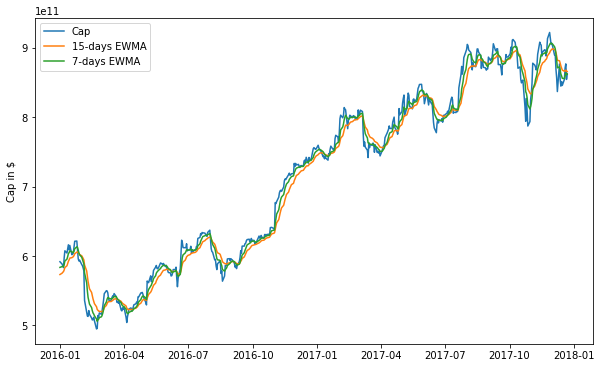

In [25]:
# This is similar code as the cell above but instead of 3 years of stock info, just using 2 years.
# Also changing rolling to exponential weighted moving average (left the original commented out.)
ticker = 'AAPL'
start_date = '2016-01-01'
end_date = '2017-12-31'

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

ax.plot(df_cap.loc[start_date:end_date, :].index, df_cap.loc[start_date:end_date, 'AAPL'], label='Cap')
# ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'AAPL'], 
#           label = '%d-days SMA' % window_2)
ax.plot(exp_wgt_mov_avg_long.loc[start_date:end_date, :].index, exp_wgt_mov_avg_long.loc[start_date:end_date, 'AAPL'], 
            label = '%d-days EWMA' % exp_wgt_mov_avg_window_b)
ax.plot(exp_wgt_mov_avg_short.loc[start_date:end_date, :].index, exp_wgt_mov_avg_short.loc[start_date:end_date, 'AAPL'], 
         label = '%d-days EWMA' % exp_wgt_mov_avg_window_a)

ax.legend(loc='best')
ax.set_ylabel('Cap in $')

plt.show()

In [26]:
# Manipulate raw data
# NOTE: .sum() has axis 1 because we want the sum of the column which is just
#       1 ticker symbol.
#       .mean() will then take the mean average of all the ticker symbol 
average_market_cap = df_cap.sum(axis=1).mean()

# Average
short_ewma_average = exp_wgt_mov_avg_short / average_market_cap
long_ewma_average = exp_wgt_mov_avg_long / average_market_cap
df_cap_average = df_cap / average_market_cap
#
# By looking at the debug cells below, we see that both heads for the long and short de-meaned pandas Dataframes have NaN 
# (Not-a-number.)
# Going to only start with the first valid number
# Using .first_valid_index
short_ewma_average_first_valid = (short_ewma_average 
                                    /
                                    short_ewma_average.loc[ short_ewma_average.first_valid_index() ])
long_ewma_average_first_valid = (long_ewma_average
                                   /
                                   long_ewma_average.loc[ long_ewma_average.first_valid_index() ])

# De-mean

short_ewma_demeaned = short_ewma_average_first_valid.pct_change(periods=1).shift(-1)
long_ewma_demeaned = long_ewma_average_first_valid.pct_change(periods=1).shift(-1)

In [27]:
# Clean data

# Drop last row
market_cap = df_cap_average[:-1]

# Drop not-a-numbers
signal_1 = short_ewma_demeaned.copy()
signal_2 = long_ewma_demeaned.copy()
#
signal_1 = signal_1.dropna()
signal_2 = signal_2.dropna()

# # Get rid rows where dates that do not match
market_cap = market_cap[ market_cap.index.isin(signal_1.index) & market_cap.index.isin(signal_2.index)]
signal_1 = signal_1[signal_1.index.isin( market_cap.index )]
signal_2 = signal_2[signal_2.index.isin( market_cap.index )]

In [28]:
# Get the amount of time steps
t = market_cap.shape[0]
t

2079

In [29]:
# Get the number of stocks
n = market_cap.shape[1]
n

30

In [30]:
start_date = '2010-1-1'
end_date = '2017-12-31'

# Only get the dates required
market_cap_focused = market_cap.loc[ start_date : end_date ]
signal_1_focused = signal_1.loc[ start_date : end_date ]
signal_2_focused = signal_2.loc[ start_date : end_date ]

# Mentioned in the instructions, 2 signals means k = 2
k = 2

In [31]:
# Creating a Pandas Dataframe to hold the results
results = pd.DataFrame( [],
                        index = market_cap_focused.columns,
                        columns = [ 'kappa','sigma','sigma2','w1','w2'] )

In [32]:
# Tensorflow graph
tf.compat.v1.reset_default_graph()

# Input
x = tf.compat.v1.placeholder( shape = (None, n),
                    dtype = tf.float32,
                    name = 'x' )

# Signals
z1  = tf.compat.v1.placeholder( shape = (None,n),
                      dtype = tf.float32,
                      name = 'z1' ) 
z2  = tf.compat.v1.placeholder( shape = ( None, n),
                      dtype=tf.float32,
                      name = 'z2' )

# Variables
N_k = n
N_s = n
N_w = n
kappa = tf.compat.v1.get_variable( "kappa",
                         initializer = tf.compat.v1.random_uniform(
                                             [N_k], 
                                             minval = 0.0,
                                             maxval = 1.0) )
sigma = tf.compat.v1.get_variable( "sigma",
                         initializer = tf.compat.v1.random_uniform( 
                                             [N_s],
                                             minval=0.0,
                                             maxval=0.1) )

# Weights
#-------------------
w1_init = tf.compat.v1.random_normal( [N_w],
                            mean=0.5,
                            stddev=0.1 )
w2_init = 1 - w1_init
w1 = tf.compat.v1.get_variable( "w1",
                      initializer = w1_init)
w2 = tf.compat.v1.get_variable( "w2",
                      initializer=w2_init )

W1 = w1*tf.ones(n)
W2 = w2*tf.ones(n)


# Gaussian
#-------------------
mu    = tf.zeros( [n] )
Sigma = sigma*tf.ones( [n] )
theta1 = tf.multiply( W1,
                      z1)
theta2 = tf.multiply( W2,
                      z2)
scale  = tf.slice( x,
                   [0,0],
                   [1,-1] )
theta  = tf.multiply( scale,
                      tf.compat.v1.cumprod( 1 + tf.add( theta1,
                                              theta2) ) )

Kappa = kappa*tf.ones( [n] )

r = tf.divide( tf.subtract( tf.compat.v1.manip.roll( x,
                                           shift = -1,
                                           axis = 0),
                            x),
               x)
v = tf.subtract( r, 
                 tf.multiply( Kappa,
                              tf.subtract( theta,
                                           x) ) )
# NOTE: Do not use last row
vuse = tf.slice( v,
                 [0,0],
                 [tf.shape(v)[0]-1,-1] )

#  Constraint - No negative
#-------------------
clip_w1 = w1.assign(tf.maximum(0., w1))
clip_w2 = w2.assign(tf.maximum(0., w2))
clip = tf.group(clip_w1, clip_w2)

dist = tfp.distributions.MultivariateNormalDiag(loc=mu, scale_diag=Sigma)
log_prob = dist.log_prob(vuse)
reg_term = tf.reduce_sum(tf.square(w1+w2-1))
neg_log_likelihood = -tf.reduce_sum(log_prob) + 0.01*reg_term

# Optimizer
#-------------------
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001)
train_op = optimizer.minimize( neg_log_likelihood )

In [33]:
max_iteration = 7000
tolerence = 1e-15

In [34]:
# Save Tensorflow model because running the weight
saver = tf.compat.v1.train.Saver()

# Run Tensorflow
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    
    losses = sess.run([neg_log_likelihood], feed_dict={x: market_cap_focused, z1: signal_1_focused, z2: signal_2_focused})
    i=1
    
    # Calibrate print out
    print( "------------------- Calibration Calculating ----------------------" )
    print(" iter |       Loss       |   difference")
    
    while True:

        sess.run(train_op, feed_dict={x: market_cap_focused, z1: signal_1_focused, z2: signal_2_focused})
        sess.run(clip) # force weights to be non-negative

        # update loss
        new_loss = sess.run(neg_log_likelihood, feed_dict={x: market_cap_focused, z1: signal_1_focused, z2: signal_2_focused})
        loss_diff = np.abs(new_loss - losses[-1])
        losses.append(new_loss)

        if i%min(1000,(max_iteration/20))==1:
            print ("{:5} | {:16.4f} | {:12.4f}".format(i,new_loss,loss_diff))

        if loss_diff < tolerence:
            print('Loss function convergence in {} iterations!'.format(i))
            print('Old loss: {}  New loss: {}'.format(losses[-2],losses[-1]))
            break

        if i >= max_iteration:
            print('Max number of iterations reached without convergence.')
            break

        i += 1

    # Put data in pandas Dataframe.
    results['kappa'] = sess.run(kappa)
    results['sigma'] = sess.run(sigma)
    results['sigma^2'] = sess.run(sigma)**2
    results['w1'] = sess.run(W1)
    results['w2'] = sess.run(W2)

    fitted_means = sess.run(theta, feed_dict={x: market_cap_focused, z1: signal_1_focused, z2: signal_2_focused})
    mean_levels = pd.DataFrame(fitted_means,index=market_cap_focused.index,columns=market_cap_focused.columns)
    
    
    print( "------------------- Calibration Results ----------------------" )
    print(results.round(4))
    
    
    save_path = saver.save(sess, './part02_model.ckpt')
    print( 'Model saved in path: {}'.format(save_path) )

------------------- Calibration Calculating ----------------------
 iter |       Loss       |   difference
    1 |       -3436.3101 |   30787.8184
  351 |     -168613.0781 |      61.1250
  701 |     -179686.1250 |       2.1719
 1051 |     -180139.6406 |       0.8281
 1401 |     -180357.1094 |       0.4375
 1751 |     -180481.8281 |       0.3125
 2101 |     -180561.9531 |       0.1875
 2451 |     -180618.4375 |       0.1406
 2801 |     -180661.5938 |       0.0938
 3151 |     -180695.3125 |       0.0938
 3501 |     -180723.6406 |       0.0625
Loss function convergence in 3827 iterations!
Old loss: -180747.40625  New loss: -180747.40625
------------------- Calibration Results ----------------------
       kappa   sigma sigma2      w1      w2  sigma^2
AAPL  1.3669  0.0155    NaN  1.0034  0.0000   0.0002
AXP   1.2568  0.0147    NaN  0.8620  0.1387   0.0002
BA    0.9632  0.0151    NaN  0.7719  0.2696   0.0002
CAT   0.7548  0.0169    NaN  0.7641  0.2858   0.0003
CSCO  1.0596  0.0159    NaN  0

C:\Users\Nabeel Fahmi\anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


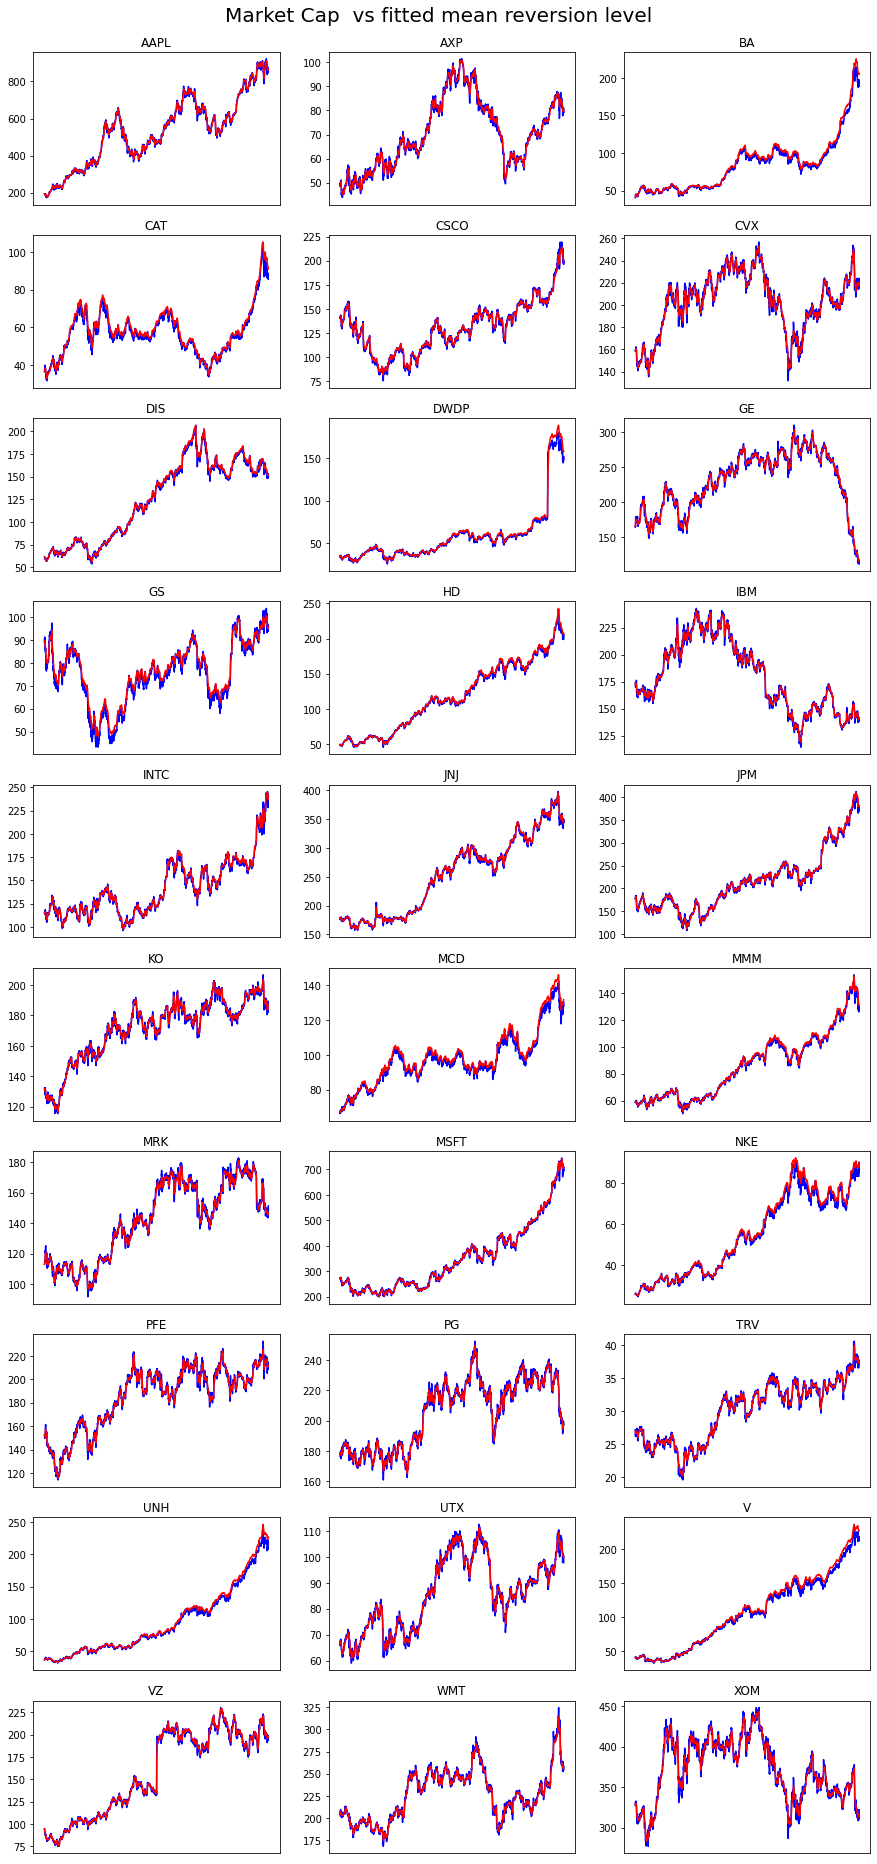

In [35]:
data = df_cap
theta = mean_levels
start_date='2010-01-01'
end_date='2017-12-31'
nplot = 30
scale = 1
title = 'Market Cap '

avg_mkt_cap = data.sum(axis=1).mean() # average market cap over the period

N = data.shape[1]


if N > nplot: N = nplot

plt.figure(figsize=(15,N))
plt.suptitle(title + ' vs fitted mean reversion level',size=20)
ytop = 0.96-0.4*np.exp(-N/5)
plt.subplots_adjust(top=ytop)

stocks = data.columns[:N]
for index, stock in enumerate(stocks,1):
    plt.subplot(np.ceil(N/3),3,index)
    plt.plot(scale*(1/1e9)*data.loc[start_date:end_date][stock],color='blue',label='Market cap ($Bn)')
    plt.plot(scale*(avg_mkt_cap/1e9)*theta.loc[start_date:end_date][stock],color='red',label='Mean reversion level')
    plt.title(stock,size=12)
    plt.xticks([])
plt.show()    

Part 2 - Result I ran the model only once and converged at 1060 iterations, which is similar to Part 1 which converged around 700 to 1000 iterations or does not converge after 5000 iterations. I would assume it is due to the randomization of the weights at each initialization. Looking at the results, we can see the weight 1 is more favorable which is assigned to our short position. As we can see from the overlapping curves plotted, which means we converged to the predicted value

<p style='text-align: center;'> ---------X-----------------------------X-------------------------X---------------------------X--------------------</p>

## Part 3: Here we are doing same process for the S&P500 market portfolio

Try to repeat our analysis for the S&P500 portfolio. 

In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf
import progressbar

import matplotlib.pyplot as plt
from datetime import datetime

In [37]:
df_cap = pd.read_csv('spx_holdings_and_spx_closeprice.csv',
                     date_parser=lambda dt: pd.to_datetime(dt, format='%Y-%m-%d'),
                     index_col = 0).dropna()
df_cap.head()
#df_cap = df_cap.drop(['SPX'],axis="columns",inplace=True)

A       AA    AAPL     ABC      ABT     ADBE      ADI  \
2000-01-27  46.1112  78.9443  3.9286  4.5485  13.7898  15.6719  48.0313   
2000-01-28  45.8585  77.8245  3.6295  4.5485  14.2653  14.3906  47.7500   
2000-01-31  44.5952  78.0345  3.7054  4.3968  14.5730  13.7656  46.7500   
2000-02-01  47.8377  80.7640  3.5804  4.5333  14.7128  13.9688  49.0000   
2000-02-02  51.5434  83.4934  3.5290  4.5788  14.7968  15.3281  48.1250   

                ADM      ADP    ADSK  ...     STJ      SVU      SWY      TEG  \
2000-01-27  10.8844  39.5477  8.1250  ...  5.5918  86.6178  26.3983  11.3873   
2000-01-28  10.7143  38.5627  7.7188  ...  5.4520  82.4218  27.4137  11.2230   
2000-01-31  10.6576  37.3807  7.6406  ...  5.5499  86.3181  28.2444  11.0862   
2000-02-01  10.8844  37.9717  7.9219  ...  5.4240  83.0212  28.7982  11.1683   
2000-02-02  10.6576  35.9032  7.9688  ...  5.3541  81.5226  28.6136  11.1956   

                TER     TGNA      THC        X    MAR.1      SPX  
2000-01-27  65.8677  22.1921  60.9705  20.7086  12.2457  1398.56  
2000-01-28  60.3487  21.7558  62.3032  20.1183  12.0742  1360.16  
2000-01-31  62.1484  22.0533  60.6373  19.5772  12.1722  1394.46  
2000-02-01  67.3674  22.2120  60.4708  19.5772  12.5151  1409.28  
2000-02-02  68.9271  22.6483  62.4698  19.5281  12.3192  1409.12  

[5 rows x 419 columns]

In [38]:
df_cap.drop(['SPX'],axis="columns",inplace=True)

In [39]:
# add dates
dates = pd.bdate_range(start='2010-01-04', end=None, periods=df_cap.shape[0], freq='B')
df_cap['date'] = dates

df_cap.set_index('date',inplace=True)


## Let us build some signals 

Here we provide a "warm start" by computing two simple moving average signals that you can use as benchmark in your analysis.

### Generate moving averages

In [40]:
# Calculating the long-window (30 days) simple moving average

window_1 = 10
short_rolling = df_cap.rolling(window=window_1).mean()
# long_rolling.tail()

In [41]:
# Calculating the short-window (10 days) simple moving average

window_2 = 30

long_rolling = df_cap.rolling(window=window_2).mean()
# short_rolling.head(20)

### Plot three years of AAPL stock:

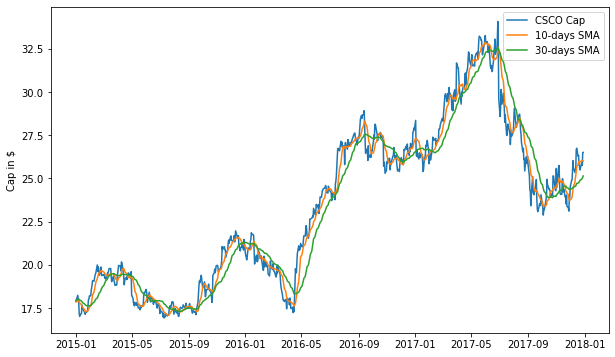

In [42]:
ticker = 'CSCO'
start_date = '2015-01-01'
end_date = '2017-12-31'

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)


ax.plot(df_cap.loc[start_date:end_date, :].index, df_cap.loc[start_date:end_date, str(ticker)], label= str(ticker) + ' Cap')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, str(ticker)], 
          label = '%d-days SMA' % window_1)
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, str(ticker)], 
         label = '%d-days SMA' % window_2)

ax.legend(loc='best')
ax.set_ylabel('Cap in $')

plt.show()

#        Econometric Model for IRL - Based Mean Reversion Level Estimation

This code uses Inverse Reinforcement Learning in order to achieve a model that predicts market     capitalization using a couple of trading signals provided by the requirements of the project.                   
                                                                                                     
The code is divided in three parts:  

1. Data preparation: we tune dataset provided by the project:   
  1.1. We normalize data using the simplest way, dividing by mean of market capitalization <br>
  1.2. We create trading signals          
  1.3. We get rid off NaN data                                                                      
  1.4. We prepare matrices with selecting the date interval required by the project                                                                                                                     
<br>
2. Tensorflow modeling:                                                                             
  2.1. We switch on the tensorflow graph and create three placeholders for market capitalizacion, trading signals 1 and trading signal 2                                                                         
  2.2. We compound the formulas provided by Halpering in the course                                 
  2.3. We define loss function and optimizer (we use Adam optimization)                             
  2.4. We run the model tracking the loss amounts calculated                                        
  2.5. We store the results of our predictors                                                      
<br>                                                                                              
3. Displaying the results:                                                                                 
  3.1 We show parameters Kappa, Sigma, W1 and W2                                                    
  3.2 We calculate market capitalization of every single asset using our predictor                 
  3.3 And finally we provide a report plotting comparation between our prediction and real data     

In [43]:
# Put the rest of your code and analysis for Part 1 here.

# We calculate average market capitalization
mkt_cap = df_cap.sum(axis=1)
avg_mkt_cap = mkt_cap.mean()

# We show Average Market Capitalization, key parameter for the results of this project. 
# This model calibrates a linear formula that can fix the market capitalization of a single stock for 
# a given period of time from the Average Market Capitalization of the whole market.
print ("Average Market Capitalizacion ($Bn): %6.2f" % (avg_mkt_cap))

Average Market Capitalizacion ($Bn): 16366.79


In [44]:
#### 1. Data preparation: we tune dataset provided by the project: 

In [45]:
# We normalize data dividing by average market capitalization
short_roll_avg = short_rolling / avg_mkt_cap
long_roll_avg = long_rolling / avg_mkt_cap
mkt_cap_avg = df_cap / avg_mkt_cap

short_roll_avg.head(15)

A        AA      AAPL       ABC       ABT      ADBE  \
date                                                                     
2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-07       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-08       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-11       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-12       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-13       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-14       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-15  0.003040  0.004774  0.000233  0.000272  0.000910  0.001045   
2010-01-18  0.003074  0.004740  0.000234  0.000270  0.000922  0.001088   
2010-01-19  0.003104  0.004728  0.000235  0.000267  0.000928  0.001139   
2010-01-20  0.003146  0.004745  0.000238  0.000264  0.000935  0.001191   
2010-01-21  0.003191  0.004757  0.000242  0.000260  0.000941  0.001242   
2010-01-22  0.003209  0.004752  0.000245  0.000255  0.000945  0.001298   

                 ADI       ADM       ADP      ADSK  ...      SPLS       STJ  \
date                                                ...                       
2010-01-04       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-05       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-06       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-07       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-08       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-11       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-12       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-13       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-14       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-15  0.003195  0.000651  0.002287  0.000515  ...  0.000721  0.000335   
2010-01-18  0.003257  0.000645  0.002273  0.000524  ...  0.000735  0.000334   
2010-01-19  0.003315  0.000640  0.002258  0.000533  ...  0.000755  0.000335   
2010-01-20  0.003387  0.000637  0.002253  0.000543  ...  0.000765  0.000336   
2010-01-21  0.003454  0.000632  0.002243  0.000551  ...  0.000769  0.000341   
2010-01-22  0.003549  0.000630  0.002244  0.000559  ...  0.000768  0.000344   

                 SVU       SWY       TEG       TER      TGNA       THC  \
date                                                                     
2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-07       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-08       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-11       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-12       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-13       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-14       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-15  0.005038  0.001716  0.000686  0.004197  0.001363  0.003738   
2010-01-18  0.005007  0.001721  0.000685  0.004258  0.001361  0.003711   
2010-01-19  0.005003  0.001720  0.000684  0.004331  0.001359  0.003670   
2010-01-20  0.004957  0.001713  0.000685  0.004405  0.001354  0.003635   
2010-01-21  0.004963  0.001703  0.000685  0.004453  0.001344  0.003602   
2010-01-22  0.004964  0.001698  0.000685  0.004501  0.001329  0.003550   

                   X     MAR.1  
date                            
2010-01-04       NaN       NaN  
2010-01-05       NaN       NaN  
2010-01-06       NaN     

In [46]:
# Model will not work if it detects NaN fields. We must get rid off them
# Rolling average uses first "window" numbers to calculate the first valid rolling average value
# Due to this fact, first non-empty data will be "window-1"
# i.e. 10-day rolling average will use the first 10 data to calculate its first valid value, 
# therefore the first valid data will be found in the tenth row of the list
# We get rid off the first empty rows

short_roll_avg = short_roll_avg.iloc[(window_1-1):,:]
long_roll_avg = long_roll_avg.iloc[(window_2 -1):,:]

# We check that we've got rid off Nan fields properly
short_roll_avg.head(10)

A        AA      AAPL       ABC       ABT      ADBE  \
date                                                                     
2010-01-15  0.003040  0.004774  0.000233  0.000272  0.000910  0.001045   
2010-01-18  0.003074  0.004740  0.000234  0.000270  0.000922  0.001088   
2010-01-19  0.003104  0.004728  0.000235  0.000267  0.000928  0.001139   
2010-01-20  0.003146  0.004745  0.000238  0.000264  0.000935  0.001191   
2010-01-21  0.003191  0.004757  0.000242  0.000260  0.000941  0.001242   
2010-01-22  0.003209  0.004752  0.000245  0.000255  0.000945  0.001298   
2010-01-25  0.003289  0.004784  0.000248  0.000253  0.000948  0.001348   
2010-01-26  0.003361  0.004815  0.000249  0.000248  0.000943  0.001385   
2010-01-27  0.003410  0.004845  0.000248  0.000245  0.000942  0.001417   
2010-01-28  0.003492  0.004881  0.000249  0.000241  0.000936  0.001441   

                 ADI       ADM       ADP      ADSK  ...      SPLS       STJ  \
date                                                ...                       
2010-01-15  0.003195  0.000651  0.002287  0.000515  ...  0.000721  0.000335   
2010-01-18  0.003257  0.000645  0.002273  0.000524  ...  0.000735  0.000334   
2010-01-19  0.003315  0.000640  0.002258  0.000533  ...  0.000755  0.000335   
2010-01-20  0.003387  0.000637  0.002253  0.000543  ...  0.000765  0.000336   
2010-01-21  0.003454  0.000632  0.002243  0.000551  ...  0.000769  0.000341   
2010-01-22  0.003549  0.000630  0.002244  0.000559  ...  0.000768  0.000344   
2010-01-25  0.003657  0.000628  0.002228  0.000568  ...  0.000765  0.000347   
2010-01-26  0.003731  0.000627  0.002211  0.000576  ...  0.000756  0.000348   
2010-01-27  0.003806  0.000625  0.002189  0.000575  ...  0.000749  0.000351   
2010-01-28  0.003907  0.000621  0.002174  0.000574  ...  0.000736  0.000353   

                 SVU       SWY       TEG       TER      TGNA       THC  \
date                                                                     
2010-01-15  0.005038  0.001716  0.000686  0.004197  0.001363  0.003738   
2010-01-18  0.005007  0.001721  0.000685  0.004258  0.001361  0.003711   
2010-01-19  0.005003  0.001720  0.000684  0.004331  0.001359  0.003670   
2010-01-20  0.004957  0.001713  0.000685  0.004405  0.001354  0.003635   
2010-01-21  0.004963  0.001703  0.000685  0.004453  0.001344  0.003602   
2010-01-22  0.004964  0.001698  0.000685  0.004501  0.001329  0.003550   
2010-01-25  0.004977  0.001695  0.000683  0.004533  0.001315  0.003506   
2010-01-26  0.004979  0.001690  0.000681  0.004561  0.001299  0.003445   
2010-01-27  0.004988  0.001688  0.000679  0.004598  0.001288  0.003395   
2010-01-28  0.004983  0.001687  0.000676  0.004618  0.001273  0.003327   

                   X     MAR.1  
date                            
2010-01-15  0.001186  0.000771  
2010-01-18  0.001170  0.000773  
2010-01-19  0.001158  0.000778  
2010-01-20  0.001152  0.000780  
2010-01-21  0.001153  0.000782  
2010-01-22  0.001156  0.000785  
2010-01-25  0.001156  0.000784  
2010-01-26  0.001153  0.000776  
2010-01-27  0.001153  0.000769  
2010-01-28  0.001151  0.000760  

[10 rows x 418 columns]

In [47]:
# We check that we've got rid off Nan fields properly
long_roll_avg.head(10)

A        AA      AAPL       ABC       ABT      ADBE  \
date                                                                     
2010-02-12  0.003924  0.004783  0.000249  0.000239  0.000904  0.001294   
2010-02-15  0.004024  0.004775  0.000250  0.000236  0.000904  0.001304   
2010-02-16  0.004111  0.004772  0.000251  0.000234  0.000903  0.001317   
2010-02-17  0.004187  0.004752  0.000252  0.000231  0.000902  0.001330   
2010-02-18  0.004246  0.004734  0.000253  0.000228  0.000902  0.001344   
2010-02-19  0.004303  0.004721  0.000255  0.000227  0.000903  0.001361   
2010-02-22  0.004363  0.004704  0.000257  0.000225  0.000903  0.001370   
2010-02-23  0.004414  0.004693  0.000258  0.000224  0.000903  0.001377   
2010-02-24  0.004463  0.004693  0.000259  0.000223  0.000902  0.001385   
2010-02-25  0.004518  0.004695  0.000261  0.000222  0.000903  0.001394   

                 ADI       ADM       ADP      ADSK  ...      SPLS       STJ  \
date                                                ...                       
2010-02-12  0.004082  0.000609  0.002187  0.000602  ...  0.000699  0.000348   
2010-02-15  0.004161  0.000605  0.002177  0.000613  ...  0.000695  0.000348   
2010-02-16  0.004231  0.000601  0.002171  0.000625  ...  0.000692  0.000349   
2010-02-17  0.004284  0.000596  0.002170  0.000636  ...  0.000687  0.000349   
2010-02-18  0.004321  0.000591  0.002172  0.000646  ...  0.000684  0.000351   
2010-02-19  0.004384  0.000588  0.002187  0.000656  ...  0.000682  0.000352   
2010-02-22  0.004435  0.000586  0.002195  0.000664  ...  0.000679  0.000353   
2010-02-23  0.004485  0.000583  0.002202  0.000672  ...  0.000675  0.000354   
2010-02-24  0.004537  0.000580  0.002212  0.000680  ...  0.000671  0.000355   
2010-02-25  0.004607  0.000578  0.002220  0.000685  ...  0.000667  0.000357   

                 SVU       SWY       TEG       TER      TGNA       THC  \
date                                                                     
2010-02-12  0.004908  0.001691  0.000665  0.004637  0.001296  0.003372   
2010-02-15  0.004874  0.001690  0.000663  0.004677  0.001293  0.003360   
2010-02-16  0.004855  0.001690  0.000661  0.004729  0.001291  0.003343   
2010-02-17  0.004819  0.001687  0.000660  0.004761  0.001289  0.003328   
2010-02-18  0.004803  0.001687  0.000659  0.004770  0.001287  0.003324   
2010-02-19  0.004801  0.001689  0.000660  0.004779  0.001287  0.003327   
2010-02-22  0.004802  0.001691  0.000660  0.004794  0.001286  0.003328   
2010-02-23  0.004799  0.001690  0.000661  0.004817  0.001285  0.003324   
2010-02-24  0.004802  0.001695  0.000661  0.004829  0.001286  0.003325   
2010-02-25  0.004798  0.001703  0.000662  0.004853  0.001286  0.003320   

                   X     MAR.1  
date                            
2010-02-12  0.001125  0.000724  
2010-02-15  0.001118  0.000720  
2010-02-16  0.001112  0.000718  
2010-02-17  0.001107  0.000715  
2010-02-18  0.001105  0.000711  
2010-02-19  0.001105  0.000712  
2010-02-22  0.001103  0.000711  
2010-02-23  0.001102  0.000709  
2010-02-24  0.001102  0.000707  
2010-02-25  0.001102  0.000705  

[10 rows x 418 columns]

In [48]:
# We now calculate the daily varaitation of the average market capitalization
# These two lists will be our couple of trading signals
short_roll_avg_var = short_roll_avg.pct_change(periods=1).shift(-1)
long_roll_avg_var = long_roll_avg.pct_change(periods=1).shift(-1)

short_roll_avg_var.head(10)

A        AA      AAPL       ABC       ABT      ADBE  \
date                                                                     
2010-01-15  0.011172 -0.007165  0.003279 -0.009181  0.012955  0.041762   
2010-01-18  0.009793 -0.002616  0.006652 -0.012356  0.006302  0.046141   
2010-01-19  0.013594  0.003708  0.011190 -0.009728  0.007368  0.046370   
2010-01-20  0.014230  0.002523  0.017201 -0.015790  0.006583  0.042311   
2010-01-21  0.005806 -0.001169  0.013811 -0.016756  0.004723  0.045360   
2010-01-22  0.024691  0.006750  0.010288 -0.011603  0.002893  0.038244   
2010-01-25  0.021906  0.006615  0.002863 -0.016143 -0.005228  0.027485   
2010-01-26  0.014699  0.006216 -0.000221 -0.015287 -0.001269  0.023406   
2010-01-27  0.024144  0.007325  0.001207 -0.014388 -0.005807  0.017111   
2010-01-28  0.036540  0.007097  0.002262 -0.013830 -0.012593  0.019936   

                 ADI       ADM       ADP      ADSK  ...      SPLS       STJ  \
date                                                ...                       
2010-01-15  0.019180 -0.009043 -0.005921  0.016677  ...  0.020345 -0.003315   
2010-01-18  0.017940 -0.007515 -0.006618  0.017496  ...  0.026171  0.004349   
2010-01-19  0.021655 -0.005408 -0.002398  0.018987  ...  0.013116  0.003567   
2010-01-20  0.019731 -0.007069 -0.004541  0.014413  ...  0.005514  0.012948   
2010-01-21  0.027641 -0.003833  0.000403  0.014902  ... -0.001431  0.010527   
2010-01-22  0.030341 -0.002749 -0.006840  0.015708  ... -0.003820  0.007441   
2010-01-25  0.020258 -0.002757 -0.007562  0.014456  ... -0.011744  0.003693   
2010-01-26  0.020214 -0.002764 -0.010069 -0.001159  ... -0.009459  0.008585   
2010-01-27  0.026384 -0.005543 -0.006873 -0.002654  ... -0.016405  0.005351   
2010-01-28  0.035676 -0.002230 -0.000830  0.007984  ... -0.014438  0.009434   

                 SVU       SWY       TEG       TER      TGNA       THC  \
date                                                                     
2010-01-15 -0.006180  0.003122 -0.001219  0.014409 -0.001689 -0.007351   
2010-01-18 -0.000732 -0.001147 -0.001708  0.017218 -0.001336 -0.010971   
2010-01-19 -0.009151 -0.003936  0.001222  0.017011 -0.003388 -0.009706   
2010-01-20  0.001108 -0.005598  0.000000  0.011068 -0.007873 -0.008961   
2010-01-21  0.000369 -0.003146 -0.000244  0.010782 -0.011204 -0.014411   
2010-01-22  0.002582 -0.001661 -0.002687  0.007003 -0.010578 -0.012328   
2010-01-25  0.000368 -0.003171 -0.003183  0.006145 -0.011982 -0.017417   
2010-01-26  0.001839 -0.000835 -0.002457  0.008117 -0.008396 -0.014476   
2010-01-27 -0.001101 -0.000835 -0.004433  0.004384 -0.011665 -0.020084   
2010-01-28 -0.003675 -0.001504 -0.005195  0.013969 -0.011327 -0.018354   

                   X     MAR.1  
date                            
2010-01-15 -0.013178  0.002523  
2010-01-18 -0.010786  0.005808  
2010-01-19 -0.004635  0.003656  
2010-01-20  0.000353  0.002685  
2010-01-21  0.002458  0.003825  
2010-01-22  0.000332 -0.001905  
2010-01-25 -0.002828 -0.009543  
2010-01-26  0.000307 -0.009058  
2010-01-27 -0.002068 -0.011863  
2010-01-28 -0.004187 -0.016729  

[10 rows x 418 columns]

In [49]:
# In order to use consitent data, first date for all dataframes will be ruled by the longest
# rolling average. In this case, the date of the first row of the 30-day rolling average dataframe
# will rule the first day of our features
# We must delete last row of market capitalization list
mkt_cap_fix = mkt_cap_avg.iloc[(window_2-1):,:]
mkt_cap_fix = mkt_cap_fix.drop(mkt_cap_fix.index[(len(mkt_cap_fix)-1)])

short_roll_avg_var_fix = short_roll_avg_var.iloc[(window_2 - window_1):,:]
long_roll_avg_var_fix = long_roll_avg_var

In [50]:
# We drop NaN data if it exists in the data provided by Coursera
# I apoligize in advance for this redundancy but, Nan are one the most stoppers. 
# Just in case: if there are, get rid off them! 
if mkt_cap_fix.isnull().values.any():
    mkt_cap_fix = mkt_cap_fix.dropna()

if short_roll_avg_var_fix.isnull().values.any():
    short_roll_avg_var_fix = short_roll_avg_var_fix.dropna()

if long_roll_avg_var_fix.isnull().values.any():
    long_roll_avg_var_fix = long_roll_avg_var_fix.dropna()

# Get the number of stocks
n = mkt_cap_fix.shape[1]

print ("Number of stocks studied in this project: %d " % n)

Number of stocks studied in this project: 418 


In [51]:
# Provided by project requirements
# We narrow down the calibration using the following dates
start_date = '2010-1-1'
end_date = '2017-12-31'

In [52]:
# Only get the dates required
market_cap_required = mkt_cap_fix.loc[ start_date : end_date ]
signal_1_required = short_roll_avg_var_fix.loc[ start_date : end_date ]
signal_2_required = long_roll_avg_var_fix.loc[ start_date : end_date ]


In [53]:
# Lastly, we check shapes of our three main matrices. Shapes must match
market_cap_required.shape

(2056, 418)

In [54]:
signal_1_required.shape

(2056, 418)

In [55]:
signal_2_required.shape

(2056, 418)

In [56]:
# Last sanity check
# Checking if indexes of market_cap_required and signal_1_required match
market_cap_required.index.equals(signal_1_required.index)

True

In [57]:
# Checking if indexes of signal_1_required and signal_2_required match
signal_1_required.index.equals(signal_2_required.index)

True

#### 2: Tensor flow modeling and main IRL formulas construction

 Here must step back a minute and check Halperin's paper on its page 39. There we can check that, in the formula provided by the heading of this exam, term $\Delta t$ is missed. Then, main formulas will be the one provided in the paper

$$  {\bf v}_t \equiv \frac{{\bf x}_{t+1} -  {\bf x}_{t}}{{\bf x}_{t}}  
-  \kappa_x \circ \left({\bf W} {\bf z}_t'   - {\bf x}_t \right)  \Delta t $$

The negative log-likelihood function for observable data with this model is therefore

$$  LL_M (\Theta) = - \log \prod_{t=0}^{T-1} 
\frac{1}{ \sqrt{ (2 \pi)^{N}  \left| \Sigma_x \right| }} 
e^{ - \frac{1}{2} \left(   {\bf v}_t
 \right)^{T} 
\Sigma_x^{-1}  
\left(  {\bf v}_t \right)} $$

Our model will try to minimize the value of the negative-log likelihood referenced inmediatly above

In [59]:
max_iteration = 5000
tolerence = 1e-15

In [60]:
# Tensorflow graph
tf.compat.v1.reset_default_graph()
tf.compat.v1.disable_eager_execution()

# Our feature is market capitalization
x = tf.compat.v1.placeholder(shape =(market_cap_required.shape[0], n),dtype = tf.float32, name = 'x' )

# Our trading signals
z1  = tf.compat.v1.placeholder( shape = (signal_1_required.shape[0],n), dtype = tf.float32, name = 'z1' ) 
z2  = tf.compat.v1.placeholder( shape = (signal_2_required.shape[0],n), dtype = tf.float32, name = 'z2' )

# Weights, we intialize them randomly with a Gaussian ditribution
w1 = tf.compat.v1.get_variable( "w1", initializer = tf.compat.v1.random_normal( [n], mean=0.5, stddev=0.1 ))
w2 = tf.compat.v1.get_variable( "w2", initializer = tf.compat.v1.random_normal( [n], mean=0.5, stddev=0.1 ))
# We include dt as 1 day
dt = 1

# Predictors calculation
wz1 = w1 * z1
wz2 = w2 * z2

# With the element wise multiplication, our wz1 is fixed with the proper shape
wz1.shape
# We prepare the Tensorflow variable referenced to Kappa
kappa = tf.compat.v1.get_variable( "kappa", initializer = tf.compat.v1.random_normal( [n], mean=0.5, stddev=0.1 ) )

kappa.shape
# We extract first day of market cap for all stocks
x_1  = tf.compat.v1.slice( x, [0,0], [1,-1] )

# zeta is the linear combination of the unit predictor and our choosen signals
zeta = 1 + wz1 +wz2

# We prepare the prediction matrix generating the marketcap position for all days cosidered
# I can only converge the model using the cummulative product of theta, I tried liner combination with no success
wz  = x_1 * tf.compat.v1.cumprod(zeta)

# We prepare a maxtrix representing x(t+1)
x_t_1 = tf.compat.v1.manip.roll (x, shift = -1, axis = 0 )

delta_x = x_t_1 - x

# Final formula of total value of our portfolio
v = (delta_x / x) - (kappa * (wz - x)) * dt
# We now define the multivariate Gaussian function wich will provide us the Likelihood tool

# Standard Deviation
sigma = tf.compat.v1.get_variable( "sigma", initializer = tf.compat.v1.random_uniform([n], minval = 0.0, maxval = 0.1) )
# Mean
mu   = tf.zeros( [n] )

# Regularization term, page 40 of the Halperin's original paper, we include it
r_term = tf.reduce_sum( (w1+w2-1)**2 )

# Suggested by Halperin in his paper (page 40)
lanbda = 1e-2

gaussian_distribution = tfp.distributions.MultivariateNormalDiag(loc=mu, scale_diag=sigma) 
# Likelihood configuration                
theta = gaussian_distribution.log_prob(v)
ll = -tf.reduce_sum(theta) + (lanbda * r_term)
# Optimizer Configuration, we use Adam  
opt = tf.compat.v1.train.AdamOptimizer(learning_rate=1e-4)
train_op = opt.minimize(ll)

In [61]:
# Run Tensorflow session

# We're recording loss value provided by negative-log likelihood in order to check its bearish trend
losses=[]

# Please feel free to tune this variable in order to test the convergence capacity of this model
max_iteration = 7000
progress = progressbar.ProgressBar()
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    
    # Train loop
    # Progressbar is not installed in Jupyter Notebook of coursera
    for t in progress(range(max_iteration)):
        # update loss, we run this graph just to evaluate the loss and track it
        loss_updated = sess.run(ll, feed_dict={x: market_cap_required, z1: signal_1_required, z2: signal_2_required})
        
        # Evaluate and minimize train_op
        sess.run(train_op, feed_dict={x: market_cap_required, z1: signal_1_required, z2: signal_2_required})
        
        # we track loss update in order to paint its evolution
        losses.append(loss_updated)

    # We create a list with the predictors calculated by Tensorflow 
    # It should have a (t,n) shape being:
    # t = number of days considered
    # n = number of assets capitalized
    wz_result,v_result = sess.run([wz, v], feed_dict={x: market_cap_required, z1: signal_1_required, z2: signal_2_required})
    
    # We record our calibrated wz data, it will be used 
    # to compare our estimation against the provided dataset
    wz = pd.DataFrame(wz_result,index=market_cap_required.index,columns=market_cap_required.columns)
    v = pd.DataFrame(v_result,index=market_cap_required.index,columns=market_cap_required.columns)
    
    # Creating a Pandas Dataframe to hold the results
    results = pd.DataFrame( [],
                        index = market_cap_required.columns,
                        columns = [ 'w1','w2','kappa','sigma'] )
    
    # We record our estimated parameters kappa, sigma and our signal factors
    # w1 and w2
    results['kappa'] = sess.run(kappa)
    results['sigma'] = sess.run(sigma)
    results['w1'] = sess.run(w1)
    results['w2'] = sess.run(w2)

100% (7000 of 7000) |####################| Elapsed Time: 0:19:58 Time:  0:19:58


### 3. Plot the results

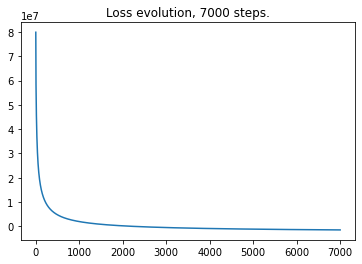

In [62]:
# We plot loss evolution during Tensorflow Training
title_loss = "Loss evolution, " + str(max_iteration) + " steps."
plt.title(title_loss)
plt.plot(losses)
plt.show()

C:\Users\Nabeel Fahmi\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


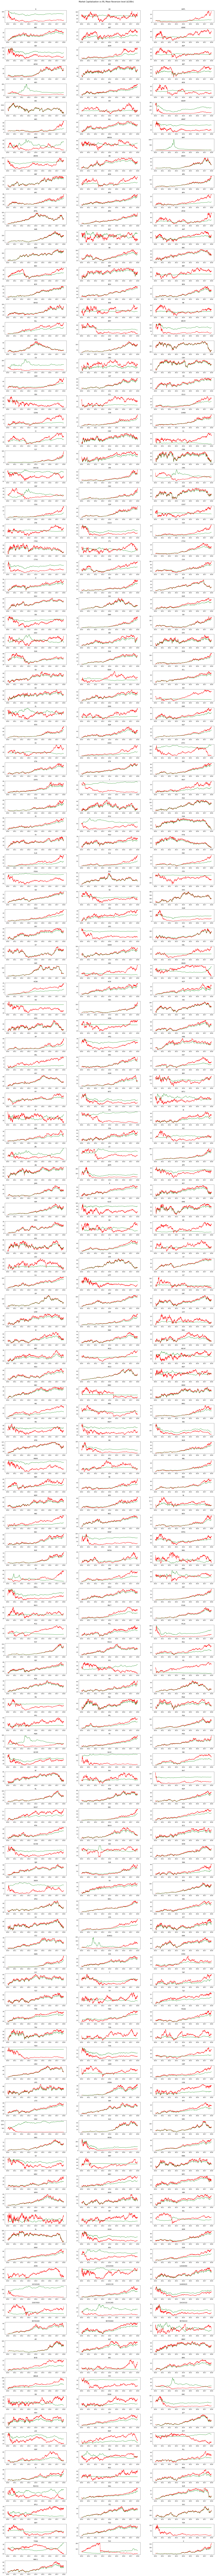

In [63]:
# We plot a brief report of the comparationg between given dataset 
# and our predictions
plt.figure(figsize=(30,2.1*n))
plt.suptitle('Market Capitalization vs IRL Mean Reversion level ($10Bn)', size=15, y=0.98)
plt.subplots_adjust(top=0.9788,bottom=0.01,hspace=0.5)

assets = df_cap.columns[:n]

num_assets = enumerate(assets,1)

for index, asset in enumerate(assets,1):
    market_cap = df_cap.loc[start_date:end_date][asset]
    irl_mean_reversion = (avg_mkt_cap) * wz.loc[start_date:end_date][asset]
    plt.subplot((n+2/4),3,index)
    plt.title(asset)
    plt.plot(market_cap,color='red',label='Market cap ($10Bn)')
    plt.plot(irl_mean_reversion,color='green',label=' IRL Mean reversion level')
      
plt.show()

As a summary we can conclude that this model can fix market capitalization of a single stock using the Average Market Capitalization of the whole market as its foundation.
Considering the extension of the paper published by Igor Halperin, I would like to note that the model proposed as the project of "Machine Learning Fundamentals" course is focused on coding the: 
*"... econometric model of market returns, which can beviewed (and estimated) as a model on its own. As will be shown below, this produces a model that predicts mean reversion in stock returns" (Igor Halpering paper, page36)*

The model seems to be able to predict market capitalization for every single stock using the average market capitalization as the starting point



Link to Halperin's paper: https://arxiv.org/pdf/1805.06126.pdf

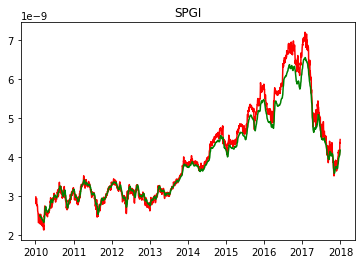

In [64]:
# Just for reader's amusement, I leave this code in order to check predictions one by one
# Feel free the 'asset' variable to check a stock

asset = 'SPGI'
asset_market_cap = (1/1e10) * df_cap.loc[start_date:end_date][asset]
irl_mean_reversion = (avg_mkt_cap/1e10) * wz.loc[start_date:end_date][asset]
plt.title(asset)
plt.plot(asset_market_cap,color='red',label='Market cap ($10Bn)')
plt.plot(irl_mean_reversion,color='green',label='Mean reversion IRL')
    
plt.show()

### Conclusion: 

Calibration got for the 418 assets of the S&P500 aren't as accurate as that got with the Dow Jones Data Set. 
We must keep in mind that data provided in the second course is not Market Cap but Closed Price. This model should be tested with actual market capitalization of the S&P500.
I haven't been able to get this data so far. Thus, I upload the code with the data provided by the course